In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing
housing_df = fetch_california_housing()

In [3]:
housing_df.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
### lets check the decription

print(housing_df.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [5]:
print(housing_df.feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [6]:
housing_data = housing_df.data

In [7]:
housing_data = pd.DataFrame(housing_df.data,columns = housing_df.feature_names)

In [8]:
housing_data.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
### lets add the target as the price
housing_data['price'] = housing_df.target

In [10]:
housing_data.head(3)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521


In [11]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [12]:
#### summarizing the data
housing_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [13]:
### check the missing values



In [14]:
housing_data.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

In [15]:
### exploratory data analysis
housing_data.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


Text(0, 0.5, 'price')

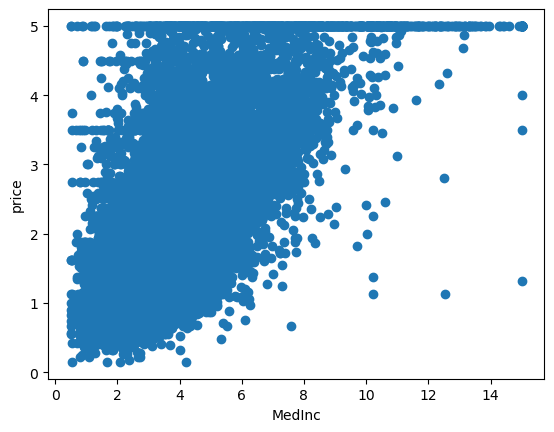

In [16]:
plt.scatter(housing_data['MedInc'],housing_data['price'])
plt.xlabel('MedInc')
plt.ylabel('price')

<Axes: xlabel='MedInc', ylabel='price'>

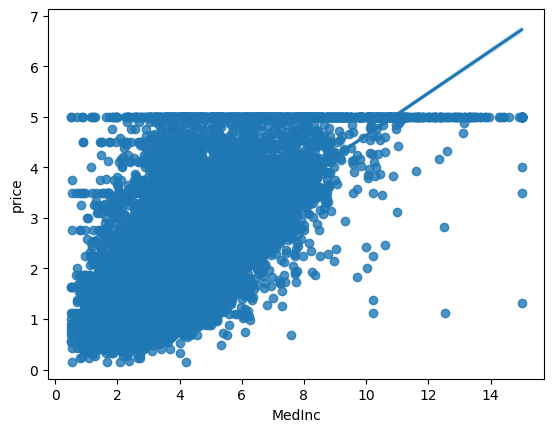

In [17]:
import seaborn as sns
sns.regplot(x = 'MedInc',y = 'price', data = housing_data)

In [18]:
x = housing_data.iloc[:,:-1]
y = housing_data.iloc[:,-1]

In [19]:
x.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [20]:
y.head(5)

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: price, dtype: float64

In [21]:
### train test split

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.3,random_state=40)

In [22]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14827,1.6389,37.0,3.733333,1.000000,1086.0,3.290909,32.66,-117.09
12640,2.1679,34.0,4.792405,1.050633,884.0,2.237975,38.53,-121.45
6016,2.4464,33.0,3.520000,0.906667,964.0,3.213333,34.06,-117.78
13650,1.9926,37.0,4.143478,1.004348,611.0,2.656522,34.08,-117.31
13275,2.6582,15.0,4.540208,1.143803,2554.0,2.416272,34.10,-117.63
...,...,...,...,...,...,...,...,...
11532,1.7675,26.0,3.847093,1.082556,1829.0,1.312994,33.77,-118.09
16065,4.4375,49.0,5.439506,1.004938,1052.0,2.597531,37.75,-122.48
14501,3.0450,16.0,2.708804,1.056433,648.0,1.462754,32.86,-117.23
14555,6.7120,15.0,7.844291,1.010381,1180.0,4.083045,32.96,-117.13


In [23]:
Y_train

14827    1.143
12640    0.754
6016     1.287
13650    0.815
13275    1.228
         ...  
11532    0.613
16065    3.292
14501    1.000
14555    2.402
11590    2.331
Name: price, Length: 14448, dtype: float64

In [24]:
### standardize the data set
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [26]:
### Training our model
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train, Y_train)



LinearRegression()

In [27]:
### coeficients
print(regression.coef_)

[ 0.81418538  0.11421899 -0.24778507  0.29236317 -0.00489909 -0.02754016
 -0.92119308 -0.88652618]


In [28]:
### predict new instances of y
y_predicts = regression.predict(X_test)

In [29]:
y_predicts_df = pd.DataFrame(y_predicts)

In [30]:
y_predicts_df.head(5)

,0
0,1.979314
1,2.540948
2,1.257992
3,2.100757
4,2.185834


In [31]:
y_predicts

array([1.97931411, 2.54094823, 1.25799223, ..., 1.62021131, 2.44548056,
       1.61087554])

In [32]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print (mean_absolute_error(Y_test,y_predicts))
print (mean_squared_error(Y_test,y_predicts))

0.541389938685063
0.5463945196624562


In [33]:
housing_df.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [34]:
regression.predict(housing_df.data[0].reshape(1,-1))

array([83.90649645])

In [35]:
### transformation of new data
scaler.transform(housing_df.data[0].reshape(1,-1))

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[ 2.32199933,  0.95269099,  0.75193064, -0.18889865, -1.0082366 ,
        -0.03656344,  1.06472583, -1.33301317]])

In [36]:
regression.predict(scaler.transform(housing_df.data[0].reshape(1,-1)))

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.02377461])

In [37]:
####
#### deployment
import pickle

In [38]:
pickle.dump(regression, open('regmodel.pkl','wb'))

In [39]:
pickled_model = pickle.load(open('regmodel.pkl','rb'))

In [40]:
pickled_model.predict(scaler.transform(housing_df.data[0].reshape(1,-1)))

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([4.02377461])